In [30]:
import glob
#from io import open
import bibtexparser
from bibtexparser.bparser import BibTexParser
import pandas as pd
from pandas import DataFrame as df
from os import path
import csv
from io import StringIO, BytesIO

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

,ARRA Indicator,Activity,Administering IC,Application ID,Contact PI Person ID,Contact PI / Project Leader,FY,FY Total Cost,FY Total Cost (Sub Projects),IC,Organization Name,Other PI or Project Leader(s),Project Number,Project Title,Serial Number,Subproject Number,Suffix,Support Year,Type
0,,R01,NICHD,6629090,1901062,"AARON, DEBORAH J",2003,138824,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-05,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,5,5
1,,R01,NICHD,6558214,1901062,"AARON, DEBORAH J",2002,22638,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,3R01HD035607-04S1,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,S1,4,3
2,,R01,NICHD,6499086,1901062,"AARON, DEBORAH J",2002,146055,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-04,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,4,5
3,,R01,NICHD,6505399,1901062,"AARON, DEBORAH J",2001,16173,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,3R01HD035607-03S1,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,S1,3,3
4,,R01,NICHD,6351396,1901062,"AARON, DEBORAH J",2001,146128,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-03,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,3,5
5,,R01,NICHD,6151161,1901062,"AARON, DEBORAH J",2000,145048,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-02,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,2,5
6,,R01,NICHD,2844101,1901062,"AARON, DEBORAH J",1999,127418,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,1R01HD035607-01A2,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,A2,1,1
7,,M01,NCRR,7607155,9127786,"ALELE, JIMMY D.",2007,,3538,RR,MEDICAL UNIVERSITY OF SOUTH CAROLINA,Not Applicable,2M01RR001070-30A1,CHARLESTON METRO STUDY,1070,5168,A1,30,2
8,,M01,NCRR,6306290,1862959,"ALPERT, BRUCE",2000,,16342,RR,UNIVERSITY OF TENNESSEE HEALTH SCI CTR,Not Applicable,5M01RR000211-35,FAMILIAL HYPERTENSION AND BIRACIAL CARDIOVASCU...,211,246,,35,5
9,,M01,NCRR,6219734,1862959,"ALPERT, BRUCE",1999,,16342,RR,UNIVERSITY OF TENNESSEE HEALTH SCI CTR,Not Applicable,2M01RR000211-34A2,FAMILIAL HYPERTENSION AND BIRACIAL CARDIOVASCU...,211,246,A2,34,2


## Merge CSV files

In [45]:
def MergeCSVs(files):
    dfs = []
    for file in files:
      word = path.basename(file).split('.')[0]
      text = open(file, "r").read().replace("\r", "\n").decode("iso-8859-1")
      df_ = df.from_dict(list(csv.DictReader(BytesIO(text.encode('utf-8')))))
      df_.insert(0, "word", [word]*len(df_))
      dfs.append(df_)
    return pd.concat(dfs)

In [46]:
NIH_df = MergeCSVs(glob.glob("Grants/NIH/*csv"))
NSF_df = MergeCSVs(glob.glob("Grants/NSF/*csv"))

In [47]:
NIH_df.head()

,word,ARRA Indicator,Activity,Administering IC,Application ID,Contact PI Person ID,Contact PI / Project Leader,FY,FY Total Cost,FY Total Cost (Sub Projects),IC,Organization Name,Other PI or Project Leader(s),Project Number,Project Title,Serial Number,Subproject Number,Suffix,Support Year,Type
0,biracial,,R01,NICHD,6629090,1901062,"AARON, DEBORAH J",2003,138824,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-05,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,5,5
1,biracial,,R01,NICHD,6558214,1901062,"AARON, DEBORAH J",2002,22638,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,3R01HD035607-04S1,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,S1,4,3
2,biracial,,R01,NICHD,6499086,1901062,"AARON, DEBORAH J",2002,146055,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-04,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,4,5
3,biracial,,R01,NICHD,6505399,1901062,"AARON, DEBORAH J",2001,16173,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,3R01HD035607-03S1,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,S1,3,3
4,biracial,,R01,NICHD,6351396,1901062,"AARON, DEBORAH J",2001,146128,,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-03,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,,,3,5


In [48]:
NSF_df.head()

,word,ARRAAmount,Abstract,AwardInstrument,AwardNumber,AwardedAmountToDate,Co-PIName(s),EndDate,LastAmendmentDate,NSFDirectorate,...,OrganizationZip,PIEmailAddress,PrincipalInvestigator,Program(s),ProgramElementCode(s),ProgramManager,ProgramReferenceCode(s),StartDate,State,Title
0,biracial,$0.00,"By the year 2050, census based projections sug...",Standard Grant,1048324,"$245,272.00",,07/31/2013,07/21/2010,SBE,...,089018559,disanche@rci.rutgers.edu,Diana Sanchez,SOCIAL PSYCHOLOGY,1332,Rosanna Guadagno,"1332, 7916",08/01/2010,NJ,EAGER: The Psychosocial Process Model of Minor...
1,biracial,$0.00,The number of Americans who self-identify as b...,Standard Grant,1226201,"$364,395.00",Kristin Pauker,08/31/2016,09/17/2012,SBE,...,089018559,disanche@rci.rutgers.edu,Diana Sanchez,SOCIAL PSYCHOLOGY,1332,Kerry Marsh,1332,09/01/2012,NJ,Exposure to Biracial Americans and Changes in ...
2,biracial,$0.00,The 2010 U.S. census estimates that 9 million ...,Standard Grant,1451768,"$12,632.00",Nicole Holliday,02/28/2017,03/13/2015,SBE,...,100121019,renee.blake@nyu.edu,Renee Blake,DDRI Linguistics,8374,William J. Badecker,"1311, 9179",03/15/2015,NY,Doctoral Dissertation Research: Sociolinguisti...
3,biracial,$0.00,This Doctoral Dissertation project on the lead...,Standard Grant,8723080,"$11,813.00",,06/30/1990,12/23/1987,SBE,...,275991350,,William Keech,POLITICAL SCIENCE,1371,Frank P. Scioli Jr.,,01/15/1988,NC,Doctoral Dissertation Research in Political Sc...
4,biracial,$0.00,In elections the media are typically believed ...,Standard Grant,9730457,"$75,000.00",,07/31/2000,04/02/1998,SBE,...,956186134,nrterkildsen@ucdavis.edu,Nayda Terkildsen,POLITICAL SCIENCE,1371,Frank P. Scioli Jr.,"0000, OTHR",03/01/1998,CA,The Media and African American Candidates: Def...


In [49]:
NSF_df.to_csv("nsf_combined.csv", encoding='utf-8')
NIH_df.to_csv("nih_combined.csv", encoding='utf-8')

## Load PsychINFO unified database

In [75]:
NSF = df.from_csv("nsf_combined.csv", encoding='utf-8')
NIH = df.from_csv("nih_combined.csv", encoding='utf-8')

In [79]:
NSF[["EndDate", "StartDate"]].head()

,EndDate,StartDate
0,07/31/2013,08/01/2010
1,08/31/2016,09/01/2012
2,02/28/2017,03/15/2015
3,06/30/1990,01/15/1988
4,07/31/2000,03/01/1998


In [83]:
NIH.head()

,word,ARRA Indicator,Activity,Administering IC,Application ID,Contact PI Person ID,Contact PI / Project Leader,FY,FY Total Cost,FY Total Cost (Sub Projects),IC,Organization Name,Other PI or Project Leader(s),Project Number,Project Title,Serial Number,Subproject Number,Suffix,Support Year,Type
0,biracial,,R01,NICHD,6629090,1901062,"AARON, DEBORAH J",2003,138824,NaN,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-05,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,NaN,NaN,5,5
1,biracial,,R01,NICHD,6558214,1901062,"AARON, DEBORAH J",2002,22638,NaN,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,3R01HD035607-04S1,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,NaN,S1,4,3
2,biracial,,R01,NICHD,6499086,1901062,"AARON, DEBORAH J",2002,146055,NaN,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-04,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,NaN,NaN,4,5
3,biracial,,R01,NICHD,6505399,1901062,"AARON, DEBORAH J",2001,16173,NaN,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,3R01HD035607-03S1,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,NaN,S1,3,3
4,biracial,,R01,NICHD,6351396,1901062,"AARON, DEBORAH J",2001,146128,NaN,HD,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,Not Applicable,5R01HD035607-03,EPI OF PHYSICAL ACTIVITY: TEENAGE TO ADULT YEARS,35607,NaN,NaN,3,5


In [67]:
NSF["StartDate"] = pd.to_datetime(NSF.StartDate)
NSF["StartYear"] = NSF.StartDate.map(lambda x: x.year)

ValueError: x has only one data point. bins or range kwarg must be given

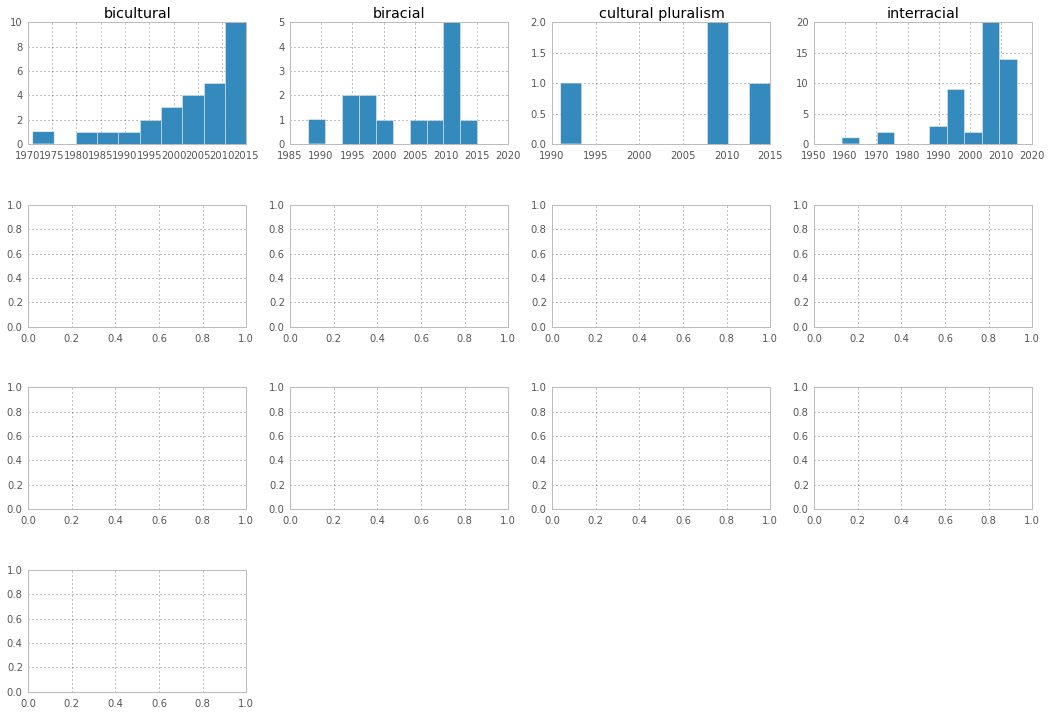

In [72]:
_ = NSF[['word', 'StartYear']].hist(figsize=(18,12), by='word')

NIH Combined Modified Dataset 
----------------------------
1. Remove the following columns: ARRA indicator, Administering IC, Application ID, Contact PI Person ID, Contact PI, Other PI, Project Number, Serial Number, Subproject Number, Suffix
1. First column --> give title 'ID #'
1. Copy the word data into a new column (title it 'terms')--> code them as the following: 1 = multiculturalism, 2 = polyculturalism, 3 = cultural pluralism, 4 = monocultural, 5 = monoracial, 6 = bicultural, 7 = biracial, 8 = biethnic, 9 = interracial, 10 = multicultural, 11 = multiracial, 12 = polycultural, 13 = polyracial, 14 = polyethnic, 15 = mixed race, 16 = mixed ethnicity, 17 = other race, 18 = other ethnicity
1. 'Activity' --> Rename 'Grant Program'
1. 'FY' - 1 --> Rename 'Start Year' 
1. Combine 'FY Total Cost' and 'FY Total Cost Subproject' Columns --> Rename 'Award Amount'
1. 'IC' --> Rename 'Grant Organization' 
1. 'Organization Name' --> Rename 'Funded Organization'
1. Add new column --> 'Organization State' [use csv file in email to get state info for universities in list]
1. 'Type'--> Rename 'Grant Type' [Recode as the following: 1 = 1 (New Grant), 2+ = 2 (Continuing Grant)]


NSF Combined Modified Dataset 
----------------------------
1. Remove the following columns: ARRA amount, Last Amendment Date, Organization City, Organization Zip, Program Element Code, State
1. First column --> give title 'ID #'
1. Copy the word data into a new column (title it 'terms')--> code them as the following: 1 = multiculturalism, 2 = polyculturalism, 3 = cultural pluralism, 4 = monocultural, 5 = monoracial, 6 = bicultural, 7 = biracial, 8 = biethnic, 9 = interracial, 10 = multicultural, 11 = multiracial, 12 = polycultural, 13 = polyracial, 14 = polyethnic, 15 = mixed race, 16 = mixed ethnicity, 17 = other race, 18 = other ethnicity
1. 'Abstract' --> Rename 'Project Abstract'
1. 'Award Instrument'--> Rename 'Grant Type' [Recode as the following: 1 = Standard Grant, 2 = Continuing Grant, 3 = Fellowship, ...] ***we should speak about this to see all possible responses in this column***
1. 'Awarded Amount to Date' --> Rename 'Award Amount'
1. 'NSF Directorate' OR 'NSF Organization' --> Rename 'Grant Organization' ***We should discuss this before you execute this***
1. 'Organization Name' --> Rename 'Funded Organization'
1. 'Program(s)' --> Rename 'Program Topic' [Recode --> first we must have a list of all possible responses in dataset]
1. 'Start Date' --> Rename 'Start Year' [Only use year from date information]
1. New Column 'Support Year': 2015-Start Year
1. New Column 'Award Length': End Date - Start Year (Years only)
1. Title --> Rename 'Project Title'

Mega NIH/NSF Dataset 
--------------------

1. New Column: 'Grant Agency' [Code --> 1 = NIH, 2 = NSF]
1. Combine the two datasets (after following the instructions below)

***NIH***

Add NIH to the beginning of each remaining column

Remove the following columns:

1. Grant Program
1. Grant Organization
1. Funded Organization?

***NSF***

Add NSF to the beginning of each remaining column

Remove the following columns: 

1. Abstract
1. NSF Organization/NSF Directorate
1. Funded Organization?
1. Program Topic 